In [22]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Binarizer
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [23]:
df=pd.read_csv('./1-7기최종.csv',encoding='cp949')
df=df.iloc[:,1:]
df

,고객번호,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,고급식료품cv,기호품cv,...,구매빈도,구매금액,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%),기타(%)
0,1,0,2.154912,1.998566,-0.423501,3.785326,-0.703766,0.002439,0.469652,-0.572023,...,-0.358051,0.751249,0.390612,-0.420830,-0.004591,-0.285059,-0.637370,-0.815035,1.182401,-0.830928
1,2,0,2.154912,1.998566,-0.423501,1.829441,-0.703766,0.188818,-0.063812,-0.615197,...,-0.416684,1.016416,0.167687,-0.303073,-0.704472,1.315183,-0.521035,-0.557374,0.792623,-0.491442
2,3,1,2.154912,1.998566,-0.423501,-0.405857,-0.703766,-1.337367,-0.974824,2.049097,...,-0.269264,-0.500063,0.813860,-0.720745,-0.435429,-0.285059,-0.458670,1.828343,-0.799093,-0.988326
3,4,1,-0.464056,1.998566,-0.423501,0.432380,-0.703766,0.159897,0.299710,-0.256348,...,-0.694773,-0.287919,-0.529452,0.484433,0.550137,-0.285059,-0.029309,1.144128,-0.799093,-0.134056
4,6,1,-0.464056,1.998566,-0.423501,-0.405857,-0.703766,-0.032283,0.365633,-0.794449,...,0.044005,-0.167647,-0.260879,-0.328832,1.215811,-0.285059,-0.392706,0.040430,0.295754,-0.471690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,19333,0,-0.464056,-2.144283,-0.085040,-0.405857,1.420926,-1.337367,0.638489,-0.236681,...,-0.718227,-0.475697,-2.093917,-0.058970,-0.058214,7.319088,0.963737,0.242709,-0.799093,0.771446
18874,19334,0,2.154912,-1.108571,-0.423501,7.976510,1.420926,0.003426,0.946073,-0.663487,...,1.280328,-0.357682,-3.293192,3.374408,1.959146,-0.285059,1.231188,0.272560,-0.799093,0.586889
18875,19335,1,-0.464056,-1.108571,-0.423501,-0.405857,1.420926,2.159328,0.420607,0.035026,...,0.526473,-0.287657,0.709267,-0.577228,-0.433580,-0.285059,0.920561,0.084813,-0.799093,1.041800
18876,19336,1,-0.464056,-1.108571,-0.423501,-0.405857,-0.703766,-0.265549,-0.974824,-1.012075,...,-1.309585,-0.077650,0.549718,-0.991833,-0.704472,1.706254,0.205760,-0.748656,0.865613,-0.715503


In [26]:
df = df.astype('int64')

In [42]:
df1=pd.read_csv('./1-8기최종.csv',encoding='cp949')
df1=df1.iloc[:,1:]
df1

,고객번호,증감확인,성별,연령대,경쟁사이용횟수,멤버쉽보유,온라인이용횟수,총구매금액,구매빈도,최근구매일,...,문구류CV_S,가구류CV_S,레저취미CV_S,전자제품CV_S,도서음반CV_S,차량용품CV_S,분기증감율,분기변동율,객단가변동률,객단가증감률
0,1,0,2.156039,1.998229,3.784157,-0.652472,-0.424659,0.769445,-0.486475,1.167623,...,-1.323632,0.736138,0.279975,0.588740,-0.624613,-0.783590,0.438791,-1.388013,0.075893,-0.670022
1,2,0,2.156039,1.998229,1.828781,-0.652472,-0.424659,1.032366,-0.460644,-0.267878,...,-1.323632,-0.123062,-1.159604,-0.158214,-0.624613,-0.783590,0.000000,-0.690965,0.705120,-0.670022
2,3,0,2.156039,1.998229,-0.405935,-0.652472,-0.424659,-0.501822,-0.315702,1.167623,...,-1.323632,-1.625508,-1.815644,1.170227,-0.624613,-0.783590,0.000000,-1.620363,-1.497173,0.000107
3,4,0,-0.463814,1.998229,0.432083,-0.652472,-0.424659,-0.286751,-0.710346,-0.472949,...,-1.323632,0.088640,0.268642,-1.264607,-0.624613,-0.783590,-0.877582,0.703133,0.075893,-0.670022
4,6,1,-0.463814,1.998229,-0.405935,-0.652472,-0.424659,-0.166226,0.080377,-0.472949,...,1.633736,0.731873,1.163341,-1.264607,-0.624613,-0.783590,-0.877582,-1.155664,-0.238720,-1.340151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18861,19333,0,-0.463814,-2.144017,-0.405935,1.068660,-0.084953,-0.478128,-0.838067,-0.062806,...,0.585925,-1.625508,1.588049,-1.264607,-0.624613,-0.783590,0.000000,-1.155664,0.705120,-0.670022
18862,19334,0,2.156039,-1.108456,7.974248,1.068660,-0.424659,-0.357708,0.858184,5.884266,...,-0.084726,0.181109,-0.557044,1.170227,0.637271,1.621021,0.438791,0.935482,1.334347,-2.010280
18863,19335,1,-0.463814,-1.108456,-0.405935,1.068660,-0.424659,-0.288700,0.466410,-0.472949,...,-0.945261,-0.684492,-0.032609,-1.264607,0.242607,0.707541,-0.877582,1.167832,0.075893,0.670236
18864,19336,1,-0.463814,-1.108456,-0.405935,-0.652472,-0.424659,-0.074066,-1.333165,0.552408,...,-1.323632,1.303824,-1.815644,-1.264607,-0.624613,-0.783590,-3.510330,0.703133,0.075893,-0.670022


In [43]:
df1 = df1.astype('int64')

In [44]:
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X

,증감확인,성별,연령대,이용횟수,경쟁사이용횟수,멤버쉽보유,가구류cv,고급식료품cv,기호품cv,도서음반cv,...,최근날짜,구매빈도,구매금액,A제휴사(%),B제휴사(%),C제휴사(%),D제휴사(%),편의품(%),선매품(%),전문품(%)
0,0,2,1,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,2,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,1,2,1,0,0,0,-1,0,2,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18873,0,0,-2,0,0,1,-1,0,0,0,...,0,0,0,-2,0,0,7,0,0,0
18874,0,2,-1,0,7,1,0,0,0,2,...,1,1,0,-3,3,1,0,1,0,0
18875,1,0,-1,0,0,1,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
18876,1,0,-1,0,0,0,0,0,-1,0,...,0,-1,0,0,0,0,1,0,0,0


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.tilte('문제점')

X_features, y_labels = 

In [7]:
df = df.astype('int64')

In [10]:
df.dtypes

고객번호       int64
증감확인       int64
성별         int64
연령대        int64
이용횟수       int64
경쟁사이용횟수    int64
멤버쉽보유      int64
가구류cv      int64
고급식료품cv    int64
기호품cv      int64
도서음반cv     int64
레저취미cv     int64
문구류cv      int64
생활잡화cv     int64
식료품cv      int64
의류잡화cv     int64
전자제품cv     int64
차량용품cv     int64
화장품cv      int64
편의품CV_S    int64
선매품CV_S    int64
전문품CV_S    int64
기타CV_S     int64
매출변동지수     int64
매출증감지수     int64
객단가변동지수    int64
객단가증감지수    int64
최근날짜       int64
구매빈도       int64
구매금액       int64
A제휴사(%)    int64
B제휴사(%)    int64
C제휴사(%)    int64
D제휴사(%)    int64
편의품(%)     int64
선매품(%)     int64
전문품(%)     int64
기타(%)      int64
dtype: object

In [45]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정트리 예측 정확도: {0:.4f}'.format(accuracy),'\n')

params = {'max_depth':[2,4,6,8]}
grid_cv = GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=3,verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼파라미터:',grid_cv.best_params_)

결정트리 예측 정확도: 0.7987 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
GridSearchCV 최고 평균 정확도 수치:0.8651
GridSearchCV 최적 하이퍼파라미터: {'max_depth': 6}


In [29]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
print('랜덤포레스트 정확도: {0:.4f}'.format(accuracy),'\n')

params = {
    'n_estimators':[10,50,100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

rf_clf = RandomForestClassifier(random_state=156, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=3, n_jobs=-1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

랜덤포레스트 정확도: 0.8551 

최적 하이퍼 파라미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 10}
최고 예측 정확도: 0.8637


In [30]:
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
i = rf_clf.feature_importances_
i

array([0.02724256, 0.02067349, 0.03715153, 0.02590872, 0.01083524,
       0.02607915, 0.03586038, 0.01191026, 0.02930686, 0.0237642 ,
       0.03460858, 0.03891638, 0.02949402, 0.02736081, 0.02143464,
       0.03613435, 0.02510785, 0.03221934, 0.01883385, 0.02729703,
       0.0178956 , 0.05634051, 0.03284602, 0.03183242, 0.03848204,
       0.03649534, 0.00818434, 0.03410149, 0.00443388, 0.01870958,
       0.01983333, 0.01740322, 0.01337561, 0.02030682, 0.074936  ,
       0.03468455])

In [31]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Mono',
 'cmsy10',
 'STIXSizeTwoSym',
 'STIXGeneral',
 'STIXGeneral',
 'DejaVu Sans',
 'STIXGeneral',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'cmss10',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'STIXSizeOneSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmr10',
 'DejaVu Serif',
 'STIXSizeOneSym',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'cmex10',
 'cmtt10',
 'STIXSizeFourSym',
 'cmb10',
 'cmmi10',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'DejaVu Sans Display',
 'Leelawadee UI',
 'CityBlueprint',
 'Technic',
 'ItalicC',
 'Monospac821 BT',
 'Trebuchet MS',
 'EuroRoman',
 'AmdtSymbols',
 'Swis721 Cn BT',
 'Palatino Linotype',
 'GreekS',
 'Comic Sans MS',
 'Segoe Print',
 'Proxy 1',
 'Simplex',
 'SimSun',
 'Microsoft Tai Le',
 'Franklin Gothic Medium',
 'Microsoft YaHei',
 'MS Gothic',
 'Myanmar Text

In [32]:
plt.rcParams['font.family'] = 'Malgun Gothic'

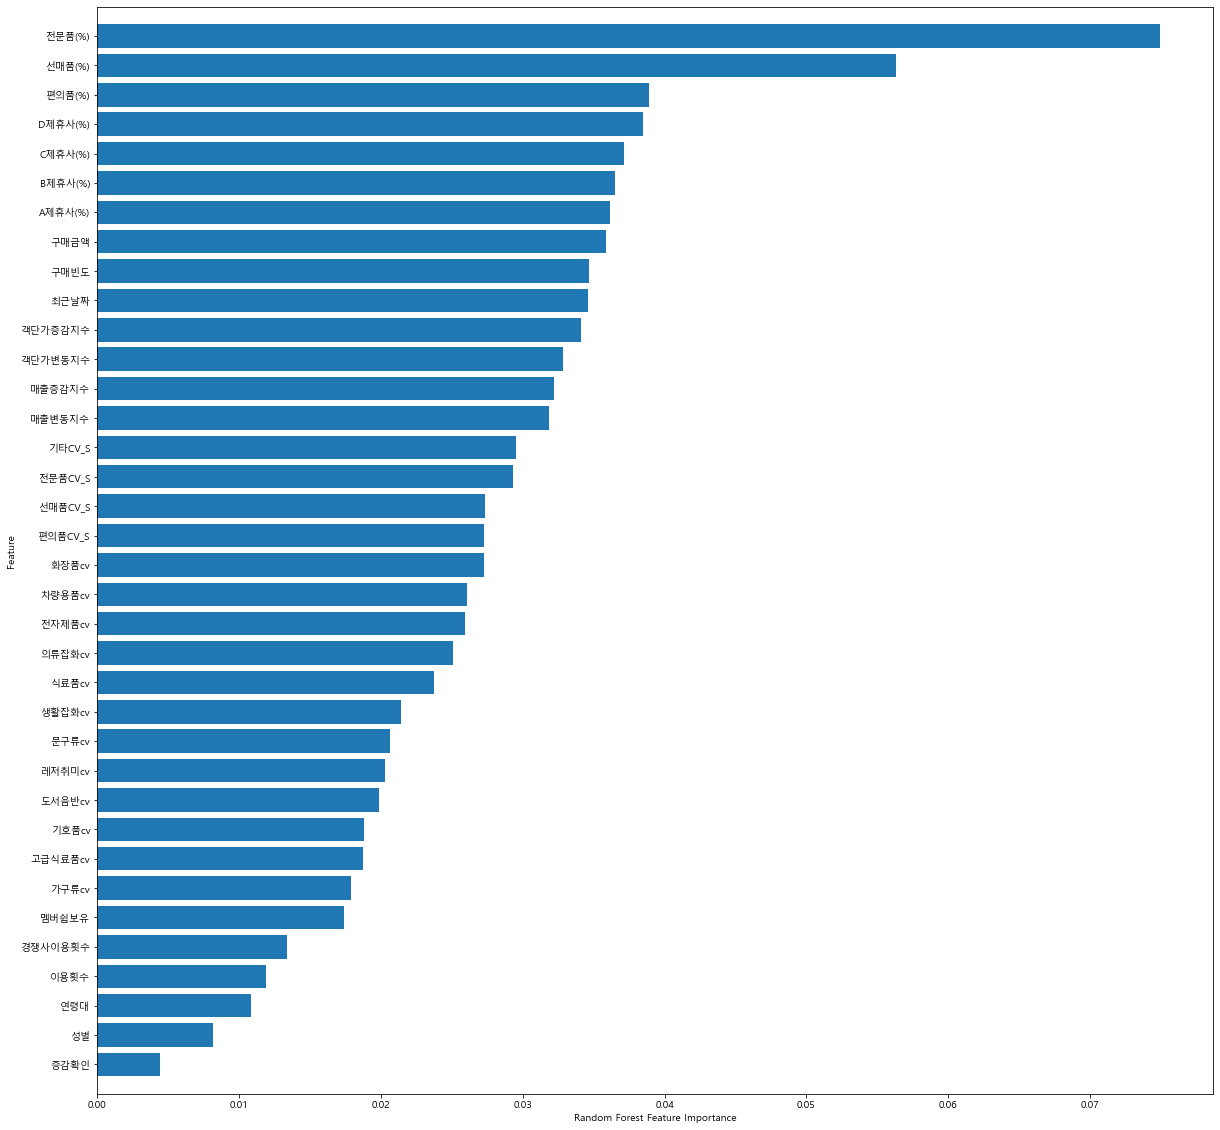

In [33]:
from sklearn.metrics import mean_squared_error

def plot_feature_importance(model):
    n_features = X_train.shape[1]
    fig, ax = plt.subplots(figsize=(20,20))
    ax.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
rf_clf = RandomForestClassifier(random_state=156)
rf_clf.fit(X_train,y_train)
plot_feature_importance(rf_clf)

In [35]:
!pip install eli5

In [36]:
import eli5 
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestClassifier

#미리 사용할 알고리즘을 fit 해야한다
model = RandomForestClassifier().fit(X_train, y_train)

perm = PermutationImportance(model, scoring = "accuracy", random_state = 22).fit(X_train, y_train) 
eli5.show_weights(perm, top = 20, feature_names = X_train.columns.tolist())

Weight,Feature
0.0828 ± 0.0016,선매품(%)
0.0653 ± 0.0024,기타CV_S
0.0413 ± 0.0015,전문품(%)
0.0409 ± 0.0019,전문품CV_S
0.0322 ± 0.0023,구매빈도
0.0310 ± 0.0015,전자제품cv
0.0251 ± 0.0009,차량용품cv
0.0218 ± 0.0014,도서음반cv
0.0218 ± 0.0007,가구류cv
0.0194 ± 0.0016,문구류cv


In [37]:
gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy),'\n')

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05,0.1]
}
grid_cv = GridSearchCV(gb_clf, param_grid=params,cv=3,verbose=1)
grid_cv.fit(X_train,y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))


GBM 정확도: 0.8562 

Fitting 3 folds for each of 4 candidates, totalling 12 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'n_estimators': 100}
최고 예측 정확도: 0.8649


In [40]:
xgb = XGBClassifier(n_estimators = 100, random_state = 156,verbose=False)
xgb.fit(X_train,y_train, early_stopping_rounds = 100, eval_set=evals, eval_metric='logloss', verbose=False)
pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, pred)

params = {'max_depth':[5,7]
    , 'min_child_weight':[1,3]
    , 'colsample_bytree':[0.5,0.75]}

gridcv = GridSearchCV(xgb, param_grid = params, cv = 3, verbose=False)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = "auc",
          eval_set = [(X_train, y_train), (X_test, y_test)])

NameError: name 'evals' is not defined

In [41]:
lgbm = LGBMClassifier(n_estimators=400)
evals = [(X_test,y_test)]
lgbm.fit(X_train, y_train, eval_set=evals, verbose=False)
pred = lgbm.predict(X_test)
accuracy = accuracy_score(y_test,pred)



params = {
    'max_depth':[128,160],
    'min_child_samples':[60,100],
    'subsample':[0.8,1]}

gridcv = GridSearchCV(lgbm, param_grid = params, cv = 3, verbose=False)
gridcv.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric = 'auc',
          eval_set = [(X_train, y_train), (X_test,y_test)])

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')



LightGBMError: Multiclass objective and metrics don't match

In [47]:
import pandas as pd
import numpy as np
season4 = pd.read_csv('17기증감라벨.csv',encoding='cp949')
season4

,고객번호,증감
0,1,0.0
1,2,0.0
2,3,1.0
3,4,1.0
4,6,1.0
...,...,...
18873,19333,0.0
18874,19334,0.0
18875,19335,1.0
18876,19336,1.0


In [49]:
import pandas as pd
import numpy as np
season5 = pd.read_csv('1-8기라벨.csv',encoding='cp949')
season5

,고객번호,14_1,15_4,퍼센트차이,증감확인
0,1,8995824.0,4375707.0,-51.358464,0
1,2,13898280.0,9915866.0,-28.654006,0
2,3,297954.0,213238.0,-28.432577,0
3,4,1288767.0,1330359.0,3.227271,0
4,6,2131469.0,2647175.0,24.194863,1
...,...,...,...,...,...
18861,19333,603348.0,429998.0,-28.731346,0
18862,19334,820744.0,384952.0,-53.097190,0
18863,19335,922771.0,1661776.0,80.085417,1
18864,19336,442432.0,4088791.0,824.162583,1
